In [1]:
import pandas as pd # library for data analsysis
import html5lib
import numpy as np
import requests # library to handle requests
from bs4 import BeautifulSoup

In [33]:
response = requests.get("http://www.healthysf.org/bdi/outcomes/zipmap.htm")
soup = BeautifulSoup(response.text, "lxml")
print(response.status_code)
table = soup.find_all("table")
sf = pd.read_html(str(table))
sf = pd.DataFrame(sf[4])

200


In [34]:
sf

,0,1,2
0,Zip Code,Neighborhood,Population (Census 2000)
1,94102,Hayes Valley/Tenderloin/North of Market,28991
2,94103,South of Market,23016
3,94107,Potrero Hill,17368
4,94108,Chinatown,13716
5,94109,Polk/Russian Hill (Nob Hill),56322
6,94110,Inner Mission/Bernal Heights,74633
7,94112,Ingelside-Excelsior/Crocker-Amazon,73104
8,94114,Castro/Noe Valley,30574
9,94115,Western Addition/Japantown,33115


In [35]:
sf.columns=sf.iloc[0]
sf=sf.iloc[1:-1]
sf

,Zip Code,Neighborhood,Population (Census 2000)
1,94102,Hayes Valley/Tenderloin/North of Market,28991
2,94103,South of Market,23016
3,94107,Potrero Hill,17368
4,94108,Chinatown,13716
5,94109,Polk/Russian Hill (Nob Hill),56322
6,94110,Inner Mission/Bernal Heights,74633
7,94112,Ingelside-Excelsior/Crocker-Amazon,73104
8,94114,Castro/Noe Valley,30574
9,94115,Western Addition/Japantown,33115
10,94116,Parkside/Forest Hill,42958


In [36]:
def insert(sf, row):
    insert_loc = sf.index.max()

    if pd.isna(insert_loc):
        sf.loc[0] = row
    else:
        sf.loc[insert_loc + 1] = row
insert(sf,[94111,'N.Water Front',3700])
insert(sf,[94105,'South Beach/Yerba Buena',6000])
insert(sf,[94129,'Presidio',3200])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [68]:
sf

,Zip Code,Neighborhood,Population (Census 2000)
1,94102,Hayes Valley/Tenderloin/North of Market,28991
2,94103,South of Market,23016
3,94107,Potrero Hill,17368
4,94108,Chinatown,13716
5,94109,Polk/Russian Hill (Nob Hill),56322
6,94110,Inner Mission/Bernal Heights,74633
7,94112,Ingelside-Excelsior/Crocker-Amazon,73104
8,94114,Castro/Noe Valley,30574
9,94115,Western Addition/Japantown,33115
10,94116,Parkside/Forest Hill,42958


In [79]:
sf1 = sf.drop('Population (Census 2000)', axis=1)

In [80]:
sf_data = sf1

In [81]:
!pip install uszipcode
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=True)

latitude = []
longitude = []

for index, row in sf1.iterrows():
    zipcode = search.by_zipcode(row["Zip Code"]).to_dict()
    latitude.append(zipcode.get("lat"))
    longitude.append(zipcode.get("lng"))

sf_data["Latitude"] = latitude
sf_data["Longitude"] = longitude

sf_data.head()

,Zip Code,Neighborhood,Latitude,Longitude
1,94102,Hayes Valley/Tenderloin/North of Market,37.780,-122.420
2,94103,South of Market,37.780,-122.410
3,94107,Potrero Hill,37.770,-122.390
4,94108,Chinatown,37.791,-122.409
5,94109,Polk/Russian Hill (Nob Hill),37.790,-122.420


In [82]:
sf_data.dtypes

0
Zip Code         object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [83]:
sf_data.set_value(13,'Latitude', 37.777)
sf_data.set_value(13,'Longitude',-122.496)
sf_data

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


,Zip Code,Neighborhood,Latitude,Longitude
1,94102,Hayes Valley/Tenderloin/North of Market,37.780,-122.420
2,94103,South of Market,37.780,-122.410
3,94107,Potrero Hill,37.770,-122.390
4,94108,Chinatown,37.791,-122.409
5,94109,Polk/Russian Hill (Nob Hill),37.790,-122.420
6,94110,Inner Mission/Bernal Heights,37.750,-122.420
7,94112,Ingelside-Excelsior/Crocker-Amazon,37.720,-122.440
8,94114,Castro/Noe Valley,37.760,-122.440
9,94115,Western Addition/Japantown,37.790,-122.440
10,94116,Parkside/Forest Hill,37.740,-122.480


In [44]:
# Create map of San Francisco

In [45]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

In [85]:
address = 'San Francisco'

geolocator = Nominatim(user_agent="To_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco is 37.7792808, -122.4192363.


In [86]:
# create map of San Francisco using latitude and longitude values
map_sf = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(sf_data['Latitude'], sf_data['Longitude'], sf_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf)  
    
map_sf

In [87]:
# The code was removed by Watson Studio for sharing.

In [88]:
LIMIT = 100 #limit of number of venuews returned by foursquare api

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [89]:
sf_venues = getNearbyVenues(names=sf_data['Neighborhood'],
                                   latitudes=sf_data['Latitude'],
                                   longitudes=sf_data['Longitude']
                                  )


Hayes Valley/Tenderloin/North of Market
South of Market
Potrero Hill
Chinatown
Polk/Russian Hill (Nob Hill)
Inner Mission/Bernal Heights
Ingelside-Excelsior/Crocker-Amazon
Castro/Noe Valley
Western Addition/Japantown
Parkside/Forest Hill
Haight-Ashbury
Inner Richmond
Outer Richmond
Sunset
Marina
Bayview-Hunters Point
St. Francis Wood/Miraloma/West Portal
Twin Peaks-Glen Park
Lake Merced
North Beach/Chinatown
Visitacion Valley/Sunnydale
N.Water Front
South Beach/Yerba Buena
Presidio


In [90]:
print(sf_venues.shape)
sf_venues.head()

(1352, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,Herbst Theater,37.779548,-122.420953,Concert Hall
1,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,War Memorial Opera House,37.778601,-122.420816,Opera House
2,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,San Francisco Ballet,37.778580,-122.420798,Dance Studio
3,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,Louise M. Davies Symphony Hall,37.777976,-122.420157,Concert Hall
4,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,War Memorial Court,37.779042,-122.420971,Park


In [127]:
sf_v1 = sf_venues
sf_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayview-Hunters Point,4,4,4,4,4,4
Castro/Noe Valley,62,62,62,62,62,62
Chinatown,100,100,100,100,100,100
Haight-Ashbury,30,30,30,30,30,30
Hayes Valley/Tenderloin/North of Market,100,100,100,100,100,100
Ingelside-Excelsior/Crocker-Amazon,37,37,37,37,37,37
Inner Mission/Bernal Heights,64,64,64,64,64,64
Inner Richmond,65,65,65,65,65,65
Lake Merced,25,25,25,25,25,25


In [92]:
print('There are {} uniques categories.'.format(len(sf_venues['Venue Category'].unique())))

There are 240 uniques categories.


In [133]:
sf_v2 = sf_v1.groupby(['Neighborhood','Venue Category'])
sfv3 = sf_v2.first()


Neighborhood Latitude  \
Neighborhood                Venue Category                                  
Bayview-Hunters Point       Bookstore                               37.73   
                            Brewery                                 37.73   
                            Food                                    37.73   
                            Motorcycle Shop                         37.73   
Castro/Noe Valley           Adult Boutique                          37.76   
                            American Restaurant                     37.76   
                            Bakery                                  37.76   
                            Bookstore                               37.76   
                            Café                                    37.76   
                            Clothing Store                          37.76   
                            Coffee Shop                             37.76   
                            Cosmetics Shop                          37.76   
                            Cycle Studio                            37.76   
                            Deli / Bodega                           37.76   
                            Dessert Shop                            37.76   
                            Dog Run                                 37.76   
                            Garden Center                           37.76   
                            Gay Bar                                 37.76   
                            Grocery Store                           37.76   
                            Hill                                    37.76   
                            Historic Site                           37.76   
                            History Museum                          37.76   
                            Hot Dog Joint                           37.76   
                            Ice Cream Shop                          37.76   
                            Indie Movie Theater                     37.76   
                            Japanese Restaurant                     37.76   
                            Juice Bar                               37.76   
                            Monument / Landmark                     37.76   
                            Nail Salon                              37.76   
                            Optical Shop                            37.76   
...                                                                   ...   
Visitacion Valley/Sunnydale Baseball Field                          37.72   
                            Garden                                  37.72   
                            Park                                    37.72   
                            Scenic Lookout                          37.72   
Western Addition/Japantown  American Restaurant                     37.79   
                            Arts & Crafts Store                     37.79   
                            Bakery                                  37.79   
                            Bubble Tea Shop                         37.79   
                            Burrito Place                           37.79   
                            Chinese Restaurant                      37.79   
                            Cosmetics Shop                          37.79   
                            Furniture / Home Store                  37.79   
                            Gym                                     37.79   
                            Gym / Fitness Center                    37.79   
                            Historic Site                           37.79   
                            Indie Movie Theater                     37.79   
                            Mexican Restaurant                      37.79   
                            Park                                    37.79   
                            Pizza Place                             37.79   
                            Playground          

In [111]:
# one hot encoding
sf_onehot = pd.get_dummies(sf_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sf_onehot['Neighborhood'] = sf_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[fixed_columns]

sf_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,Alternative Healer,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Tourist Information Center,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio,Zoo Exhibit
0,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
sf_grouped = sf_onehot.groupby('Neighborhood').mean().reset_index()
sf_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,Alternative Healer,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Tourist Information Center,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio,Zoo Exhibit
0,Bayview-Hunters Point,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,Castro/Noe Valley,0.000000,0.00,0.016129,0.00,0.000000,0.016129,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.016129,0.000000,0.00,0.000000,0.032258,0.016129,0.032258,0.000000
2,Chinatown,0.000000,0.01,0.000000,0.00,0.000000,0.040000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,0.010000,0.000000,0.010000,0.000000
3,Haight-Ashbury,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.033333,0.000000,0.000000,0.00,0.000000,0.033333,0.000000,0.033333,0.000000
4,Hayes Valley/Tenderloin/North of Market,0.000000,0.00,0.000000,0.00,0.000000,0.020000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.02,0.030000,0.030000,0.010000,0.000000,0.000000
5,Ingelside-Excelsior/Crocker-Amazon,0.000000,0.00,0.000000,0.00,0.000000,0.027027,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.054054,0.000000,0.000000,0.000000,0.000000
6,Inner Mission/Bernal Heights,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.031250,...,0.000000,0.000000,0.015625,0.000000,0.00,0.000000,0.000000,0.000000,0.015625,0.000000
7,Inner Richmond,0.015385,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.015385,...,0.000000,0.015385,0.000000,0.015385,0.00,0.030769,0.015385,0.030769,0.000000,0.000000
8,Lake Merced,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,Marina,0.000000,0.00,0.000000,0.00,0.011111,0.044444,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.011111,0.033333,0.011111,0.011111,0.000000


In [126]:
num_top_venues = 5

for hood in sf_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sf_grouped[sf_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bayview-Hunters Point----
             venue  freq
0          Brewery  0.25
1        Bookstore  0.25
2             Food  0.25
3  Motorcycle Shop  0.25
4              ATM  0.00


----Castro/Noe Valley----
             venue  freq
0          Gay Bar  0.08
1             Park  0.05
2  Thai Restaurant  0.03
3      Yoga Studio  0.03
4       Playground  0.03


----Chinatown----
                 venue  freq
0                Hotel  0.08
1          Coffee Shop  0.05
2  American Restaurant  0.04
3         Cocktail Bar  0.03
4                  Spa  0.03


----Haight-Ashbury----
                  venue  freq
0           Coffee Shop  0.13
1  Gym / Fitness Center  0.07
2         Grocery Store  0.07
3          Tennis Court  0.07
4        Scenic Lookout  0.03


----Hayes Valley/Tenderloin/North of Market----
               venue  freq
0        Coffee Shop  0.05
1       Cocktail Bar  0.04
2           Boutique  0.03
3  French Restaurant  0.03
4            Theater  0.03


----Ingelside-Excelsior/Crock

In [113]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [114]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sf_grouped['Neighborhood']

for ind in np.arange(sf_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(To_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview-Hunters Point,Brewery,Motorcycle Shop,Bookstore,Food,Zoo Exhibit,Field,Fried Chicken Joint,French Restaurant,Fountain,Food Truck
1,Castro/Noe Valley,Gay Bar,Park,Thai Restaurant,Coffee Shop,Clothing Store,Grocery Store,Pet Store,Playground,Yoga Studio,Wine Bar
2,Chinatown,Hotel,Coffee Shop,American Restaurant,Men's Store,Spa,Boutique,Cocktail Bar,Bar,Salon / Barbershop,Bubble Tea Shop
3,Haight-Ashbury,Coffee Shop,Grocery Store,Gym / Fitness Center,Tennis Court,Pet Store,Dog Run,Boutique,Bookstore,Comic Shop,Bakery
4,Hayes Valley/Tenderloin/North of Market,Coffee Shop,Cocktail Bar,Café,French Restaurant,Furniture / Home Store,Wine Bar,Vietnamese Restaurant,Beer Bar,Boutique,Thai Restaurant


In [115]:
# set number of clusters
kclusters = 8

sf_grouped_clustering = sf_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sf_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 5, 1, 5, 1, 1, 1, 1, 0, 1], dtype=int32)

In [116]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sf_merged = sf_data

# merge sf_grouped with sf_data to add latitude/longitude for each neighborhood
sf_merged = sf_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sf_merged.head() 

,Zip Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,94102,Hayes Valley/Tenderloin/North of Market,37.780,-122.420,1,Coffee Shop,Cocktail Bar,Café,French Restaurant,Furniture / Home Store,Wine Bar,Vietnamese Restaurant,Beer Bar,Boutique,Thai Restaurant
2,94103,South of Market,37.780,-122.410,1,Coffee Shop,Music Venue,Theater,Sandwich Place,Café,Art Gallery,American Restaurant,Vietnamese Restaurant,Wine Bar,Italian Restaurant
3,94107,Potrero Hill,37.770,-122.390,4,Food Truck,Coffee Shop,Café,Pizza Place,Pharmacy,Park,Gym,Sandwich Place,Pier,Street Food Gathering
4,94108,Chinatown,37.791,-122.409,1,Hotel,Coffee Shop,American Restaurant,Men's Store,Spa,Boutique,Cocktail Bar,Bar,Salon / Barbershop,Bubble Tea Shop
5,94109,Polk/Russian Hill (Nob Hill),37.790,-122.420,1,Grocery Store,Sushi Restaurant,Bar,Bakery,Breakfast Spot,Vietnamese Restaurant,Massage Studio,Diner,Sandwich Place,Coffee Shop


In [117]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sf_merged['Latitude'], sf_merged['Longitude'], sf_merged['Neighborhood'], sf_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [104]:
#Examining the Clusters
#Cluster 1

In [118]:
sf_merged.loc[sf_merged['Cluster Labels'] == 0, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Lake Merced,Gym,Snack Place,Café,Sandwich Place,Park,Halal Restaurant,Mexican Restaurant,Sushi Restaurant,Cocktail Bar,Restaurant


In [119]:
#Cluster 2
sf_merged.loc[sf_merged['Cluster Labels'] == 1, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Hayes Valley/Tenderloin/North of Market,Coffee Shop,Cocktail Bar,Café,French Restaurant,Furniture / Home Store,Wine Bar,Vietnamese Restaurant,Beer Bar,Boutique,Thai Restaurant
2,South of Market,Coffee Shop,Music Venue,Theater,Sandwich Place,Café,Art Gallery,American Restaurant,Vietnamese Restaurant,Wine Bar,Italian Restaurant
4,Chinatown,Hotel,Coffee Shop,American Restaurant,Men's Store,Spa,Boutique,Cocktail Bar,Bar,Salon / Barbershop,Bubble Tea Shop
5,Polk/Russian Hill (Nob Hill),Grocery Store,Sushi Restaurant,Bar,Bakery,Breakfast Spot,Vietnamese Restaurant,Massage Studio,Diner,Sandwich Place,Coffee Shop
6,Inner Mission/Bernal Heights,Mexican Restaurant,Dive Bar,Coffee Shop,Italian Restaurant,Grocery Store,New American Restaurant,Massage Studio,Cocktail Bar,Bakery,Gym / Fitness Center
7,Ingelside-Excelsior/Crocker-Amazon,Pizza Place,Mexican Restaurant,Pharmacy,Vietnamese Restaurant,Coffee Shop,Bar,Sandwich Place,Fried Chicken Joint,Pool Hall,Restaurant
12,Inner Richmond,Japanese Restaurant,Sushi Restaurant,Pizza Place,Bakery,Wine Shop,Burger Joint,Vietnamese Restaurant,Italian Restaurant,Korean Restaurant,Burmese Restaurant
13,Outer Richmond,Café,Chinese Restaurant,Bakery,Sporting Goods Shop,Japanese Restaurant,Vietnamese Restaurant,Dessert Shop,Pizza Place,Intersection,Seafood Restaurant
14,Sunset,Bubble Tea Shop,Bakery,Vietnamese Restaurant,Chinese Restaurant,Dim Sum Restaurant,Deli / Bodega,Cosmetics Shop,Japanese Restaurant,Dumpling Restaurant,Grocery Store
15,Marina,Italian Restaurant,French Restaurant,American Restaurant,Gym / Fitness Center,Thai Restaurant,Salad Place,Wine Bar,Mexican Restaurant,Sushi Restaurant,Taco Place


In [120]:
#Cluster 3
sf_merged.loc[sf_merged['Cluster Labels'] == 2, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Visitacion Valley/Sunnydale,Garden,Scenic Lookout,Park,American Restaurant,Baseball Field,Flower Shop,Field,Filipino Restaurant,Fish Market,Zoo Exhibit


In [121]:
#Cluster 4
sf_merged.loc[sf_merged['Cluster Labels'] == 3, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Bayview-Hunters Point,Brewery,Motorcycle Shop,Bookstore,Food,Zoo Exhibit,Field,Fried Chicken Joint,French Restaurant,Fountain,Food Truck


In [122]:
#Cluster 5
sf_merged.loc[sf_merged['Cluster Labels'] == 4, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Potrero Hill,Food Truck,Coffee Shop,Café,Pizza Place,Pharmacy,Park,Gym,Sandwich Place,Pier,Street Food Gathering
23,South Beach/Yerba Buena,Coffee Shop,Sandwich Place,Café,Food Truck,Gym,Salad Place,Juice Bar,Bar,Cocktail Bar,American Restaurant
24,Presidio,Food Truck,Café,Museum,Historic Site,Mexican Restaurant,Asian Restaurant,Sporting Goods Shop,General Entertainment,Gift Shop,Street Food Gathering


In [123]:
#Cluster 6
sf_merged.loc[sf_merged['Cluster Labels'] == 5, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Castro/Noe Valley,Gay Bar,Park,Thai Restaurant,Coffee Shop,Clothing Store,Grocery Store,Pet Store,Playground,Yoga Studio,Wine Bar
11,Haight-Ashbury,Coffee Shop,Grocery Store,Gym / Fitness Center,Tennis Court,Pet Store,Dog Run,Boutique,Bookstore,Comic Shop,Bakery
18,Twin Peaks-Glen Park,Park,Indian Restaurant,Thai Restaurant,Dog Run,Coffee Shop,Food,Café,Burger Joint,Gift Shop,Library
22,N.Water Front,Seafood Restaurant,Ice Cream Shop,Coffee Shop,Toy / Game Store,Hotel,Gift Shop,Italian Restaurant,American Restaurant,Candy Store,Bakery


In [124]:
#Cluster 7
sf_merged.loc[sf_merged['Cluster Labels'] == 6, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,St. Francis Wood/Miraloma/West Portal,Scenic Lookout,Fountain,Bus Line,Dive Bar,Pet Store,Park,Zoo Exhibit,Food Truck,Food & Drink Shop,Food


In [125]:
#Cluster 8
sf_merged.loc[sf_merged['Cluster Labels'] == 7, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Western Addition/Japantown,Chinese Restaurant,Park,Sandwich Place,Furniture / Home Store,Spa,Yoga Studio,Sushi Restaurant,Bubble Tea Shop,Bakery,Salon / Barbershop
10,Parkside/Forest Hill,Chinese Restaurant,Park,Sandwich Place,Japanese Restaurant,Pizza Place,Dance Studio,Playground,Liquor Store,Pool,Light Rail Station


In [165]:
sf

,Zip Code,Neighborhood,Population (Census 2000)
1,94102,Hayes Valley/Tenderloin/North of Market,28991
2,94103,South of Market,23016
3,94107,Potrero Hill,17368
4,94108,Chinatown,13716
5,94109,Polk/Russian Hill (Nob Hill),56322
6,94110,Inner Mission/Bernal Heights,74633
7,94112,Ingelside-Excelsior/Crocker-Amazon,73104
8,94114,Castro/Noe Valley,30574
9,94115,Western Addition/Japantown,33115
10,94116,Parkside/Forest Hill,42958


In [166]:
sfbar = sf.drop('Zip Code', axis=1)
sfbar

,Neighborhood,Population (Census 2000)
1,Hayes Valley/Tenderloin/North of Market,28991
2,South of Market,23016
3,Potrero Hill,17368
4,Chinatown,13716
5,Polk/Russian Hill (Nob Hill),56322
6,Inner Mission/Bernal Heights,74633
7,Ingelside-Excelsior/Crocker-Amazon,73104
8,Castro/Noe Valley,30574
9,Western Addition/Japantown,33115
10,Parkside/Forest Hill,42958


In [181]:
sfbar1=sfbar.astype({'Population (Census 2000)':'int'})

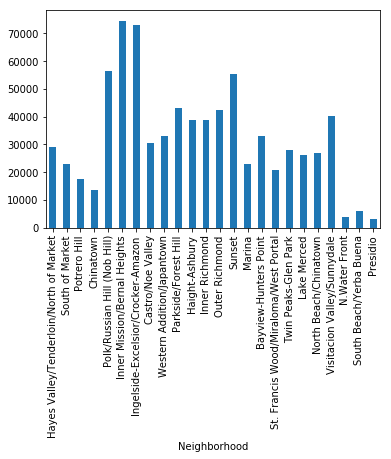

In [190]:
sfbar1.plot.bar(legend=False)